# Data Augmentation

In [1]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
from IPython.display import Audio
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
import keras
from keras.optimizers import SGD
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
from keras.utils import to_categorical





/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 =

In [2]:
# READ IN AUDIO FILES 
audio = "/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"

In [3]:
# READ IN CSV FILE FROM EDA_PREPROCESSING
audio_df=pd.read_csv('audio.csv',usecols=['emotion','path'])
audio_df.head()

,emotion,path
0,surprise,/Users/murielkosaka/Desktop/capstone_project/a...
1,surprise,/Users/murielkosaka/Desktop/capstone_project/a...
2,angry,/Users/murielkosaka/Desktop/capstone_project/a...
3,fear,/Users/murielkosaka/Desktop/capstone_project/a...
4,fear,/Users/murielkosaka/Desktop/capstone_project/a...


In [4]:
path_main="/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"


folders_main=os.listdir(path_main)

In [5]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [6]:
y, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_01/03-01-06-01-02-02-01.wav')
yt,_=librosa.effects.trim(y)

In [7]:
y=yt

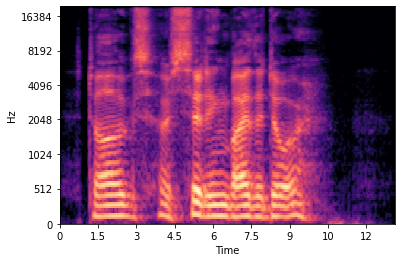

In [8]:
mel_spect = librosa.feature.melspectrogram(y=yt, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');

In [ ]:
import re

counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_08'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/sorted_data/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

08 surprised
08 surprised
08 disgust
08 sad
08 sad
08 disgust
08 angry
08 fearful
08 fearful
08 angry
08 calm
08 neutral
08 calm
08 happy
08 happy
08 neutral
08 calm
08 calm
08 happy
08 happy
08 surprised
08 surprised
08 sad
08 disgust
08 disgust
08 sad
08 fearful
08 angry
08 angry
08 fearful
08 happy
08 happy
08 calm
08 neutral
08 calm
08 surprised
08 surprised
08 angry
08 fearful
08 fearful
08 angry
08 disgust
08 sad
08 sad
08 disgust
08 surprised
08 surprised
08 fearful
08 angry
08 angry
08 fearful
08 sad
08 disgust
08 disgust
08 sad
08 happy
08 happy
08 calm
08 calm
08 neutral
08 surprised
08 surprised
08 disgust
08 sad
08 sad
08 disgust
08 angry
08 fearful
08 fearful
08 angry
08 calm
08 neutral
08 calm
08 happy
08 happy
08 neutral
08 calm
08 calm
08 happy
08 happy
08 surprised
08 surprised
08 sad
08 disgust
08 disgust
08 sad
08 fearful
08 angry
08 angry
08 fearful
08 happy
08 happy
08 calm
08 neutral
08 calm
08 surprised
08 surprised
08 angry
08 fearful
08 fearful
08 angry
08 disg

08 happy
08 calm
08 calm
08 neutral
08 surprised
08 surprised
08 disgust
08 sad
08 sad
08 disgust
08 angry
08 fearful
08 fearful
08 angry
08 calm
08 neutral
08 calm
08 happy
08 happy
08 neutral
08 calm
08 calm
08 happy
08 happy
08 surprised
08 surprised
08 sad
08 disgust
08 disgust
08 sad
08 fearful
08 angry
08 angry
08 fearful
08 happy
08 happy
08 calm
08 neutral
08 calm
08 surprised
08 surprised
08 angry
08 fearful
08 fearful
08 angry
08 disgust
08 sad
08 sad
08 disgust
08 surprised
08 surprised
08 fearful
08 angry
08 angry
08 fearful
08 sad
08 disgust
08 disgust
08 sad
08 happy
08 happy
08 calm
08 calm
08 neutral
08 surprised
08 surprised
08 disgust
08 sad
08 sad
08 disgust
08 angry
08 fearful
08 fearful
08 angry
08 calm
08 neutral
08 calm
08 happy
08 happy
08 neutral
08 calm
08 calm
08 happy
08 happy
08 surprised
08 surprised
08 sad
08 disgust
08 disgust
08 sad
08 fearful
08 angry
08 angry
08 fearful
08 happy
08 happy
08 calm
08 neutral
08 calm
08 surprised
08 surprised
08 angry
08

In [ ]:
import re

counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_01'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/sorted_data/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

01 surprised
01 surprised
01 angry
01 fearful
01 fearful
01 angry
01 disgust
01 sad
01 sad
01 disgust
01 happy
01 happy
01 calm
01 neutral
01 calm
01 happy
01 happy
01 calm
01 calm
01 neutral
01 surprised
01 surprised
01 fearful
01 angry
01 angry
01 fearful
01 sad
01 disgust
01 disgust
01 sad
01 calm
01 neutral
01 calm
01 happy
01 happy
01 surprised
01 surprised
01 disgust
01 sad
01 sad
01 disgust
01 angry
01 fearful
01 fearful
01 angry
01 surprised
01 surprised
01 sad
01 disgust
01 disgust
01 sad
01 fearful
01 angry
01 angry
01 fearful
01 neutral
01 calm
01 calm
01 happy
01 happy
01 surprised
01 surprised
01 angry
01 fearful
01 fearful
01 angry
01 disgust
01 sad
01 sad
01 disgust
01 happy
01 happy
01 calm
01 neutral
01 calm
01 happy
01 happy
01 calm
01 calm
01 neutral
01 surprised
01 surprised
01 fearful
01 angry
01 angry
01 fearful
01 sad
01 disgust
01 disgust
01 sad
01 calm
01 neutral
01 calm
01 happy
01 happy
01 surprised
01 surprised
01 disgust
01 sad
01 sad
01 disgust
01 angry
01

In [14]:
import re

counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/sorted_data/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

16 angry
16 fearful
16 fearful
16 angry
16 disgust
16 sad
16 sad
16 disgust
16 surprised
16 surprised
16 happy
16 happy
16 calm
16 neutral
16 calm
16 happy
16 happy
16 calm
16 calm
16 neutral
16 fearful
16 angry
16 angry
16 fearful
16 sad
16 disgust
16 disgust
16 sad
16 surprised
16 surprised
16 calm
16 neutral
16 calm
16 happy
16 happy
16 disgust
16 sad
16 sad
16 disgust
16 angry
16 fearful
16 fearful
16 angry
16 surprised
16 surprised
16 sad
16 disgust
16 disgust
16 sad
16 fearful
16 angry
16 angry
16 fearful
16 surprised
16 surprised
16 neutral
16 calm
16 calm
16 happy
16 happy
11 neutral
11 calm
11 calm
11 happy
11 happy
11 sad
11 disgust
11 disgust
11 sad
11 fearful
11 angry
11 angry
11 fearful
11 surprised
11 surprised
11 disgust
11 sad
11 sad
11 disgust
11 angry
11 fearful
11 fearful
11 angry
11 surprised
11 surprised
11 calm
11 neutral
11 calm
11 happy
11 happy
11 fearful
11 angry
11 angry
11 fearful
11 sad
11 disgust
11 disgust
11 sad
11 surprised
11 surprised
11 happy
11 happ

In [18]:
re.findall('\d+',file)

['03', '01', '01', '01', '02', '02', '08']

In [20]:
file

'03-01-01-01-02-02-08.wav'

## Add Noise, Stretch, Speed and Pitch to Original Audio File

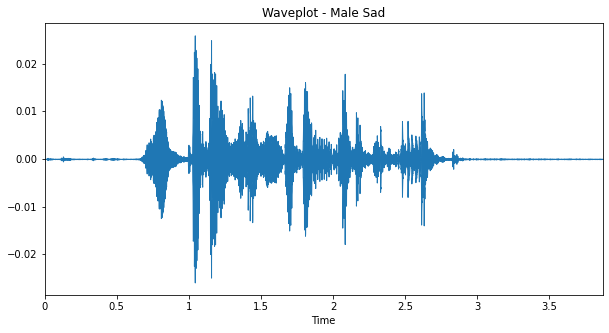

In [121]:
# MALE SAD ORIGINAL AUDIO FILE
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
x, sr = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Sad')
plt.savefig('Waveplot_MaleSad.png')


In [122]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/MaleSadOriginal.wav', x, sr)
Audio(data=x, rate=sr)


In [123]:
# FUNCTION TO ADD WHITE NOISE
def noise(x):
    noise_amp = 0.05*np.random.uniform()*np.amax(x)   
    x = x.astype('float64') + noise_amp * np.random.normal(size=x.shape[0])
    return x

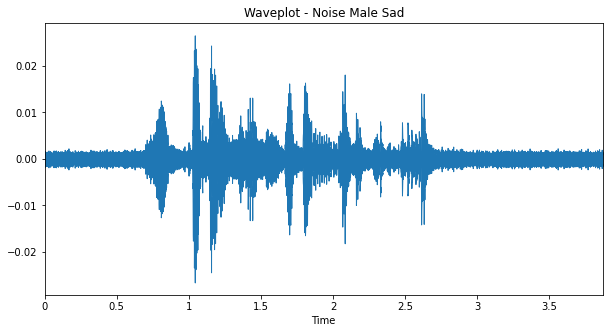

In [124]:
# ADD NOISE TO MALE SAD ORIGINAL AUDIO FILE
x = noise(x)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Noise Male Sad')
plt.savefig('Waveplot_MaleSadNoise.png')


In [126]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/MaleSadNoise.wav', x, sr)
Audio(data=x, rate=sr)

In [12]:
# FUNCTION TO STRETCH THE SOUND
def stretch(x, rate=0.8):
    data = librosa.effects.time_stretch(x, rate)
    return data

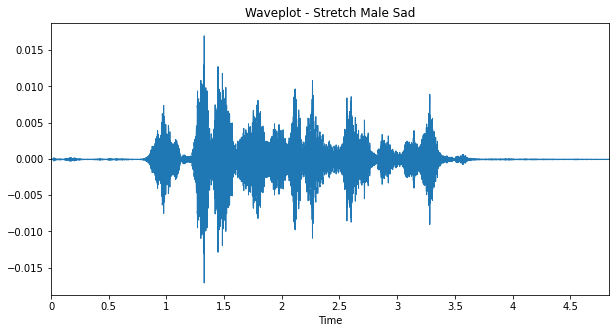

In [13]:
# ADD STRETCH TO MALE SAD ORIGINAL AUDIO FILE
x = stretch(x)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Stretch Male Sad')
plt.savefig('Waveplot_MaleSadStretch.png')

In [14]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/MaleSadStretch.wav', x, sr)
Audio(data=x, rate=sr)

In [17]:
# FUNCTION TO INCREASE SPEED AND PITCH 
def speedNpitch(x):
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.4  / length_change 
    tmp = np.interp(np.arange(0,len(x),speed_fac),np.arange(0,len(x)),x)
    minlen = min(x.shape[0], tmp.shape[0])
    x *= 0
    x[0:minlen] = tmp[0:minlen]
    return x

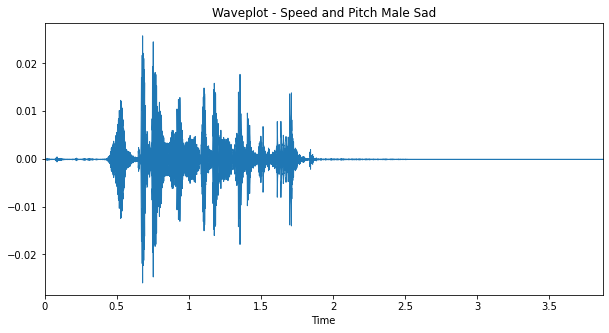

In [18]:
# ADD SPEED AND PITCH TO MALE SAD ORIGINAL AUDIO FILE
x = speedNpitch(x)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Speed and Pitch Male Sad')
plt.savefig('Waveplot_MaleSadSpeedPitch.png')

In [19]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/MaleSadSpeedPitch.wav', x, sr)
Audio(data=x, rate=sr)

## Apply Data Augmentation Methods to Entire Dataset

In [20]:
# FEATURE EXTRACTION ON RAW AUDIO FILES
df = pd.DataFrame(columns=['log_spec'])
counter=0

for index,path in enumerate(audio_df.path):
    #get wave representation
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    df.loc[counter] = [log_spectrogram]   
    counter += 1
print(len(df))
df.head()

1440


,log_spec
0,"[-71.20022, -71.20022, -71.20022, -71.20022, -..."
1,"[-70.46105, -70.46105, -70.46105, -70.46105, -..."
2,"[-64.17679, -64.39374, -64.444954, -64.26804, ..."
3,"[-73.2803, -73.2803, -73.2803, -73.2803, -73.2..."
4,"[-44.965843, -44.467876, -44.512608, -44.93480..."


In [21]:
# ADD NOISE AND USE FEATURE EXTRACTION
df_noise = pd.DataFrame(columns=['feature'])
counter=0
for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
        # noise 
    aug = noise(X)
    aug = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(aug)
    aug=np.mean(db_spec,axis=0)
    df_noise.loc[counter] = [aug]
    counter +=1
print(len(df_noise))
df_noise.head()

1440


,feature
0,"[-71.20022, -71.20022, -71.20022, -71.20022, -..."
1,"[-70.46105, -70.46105, -70.46105, -70.46105, -..."
2,"[-64.17679, -64.39374, -64.444954, -64.26804, ..."
3,"[-73.2803, -73.2803, -73.2803, -73.2803, -73.2..."
4,"[-44.965843, -44.467876, -44.512608, -44.93480..."


In [22]:
# ADD SPEED AND PITCH THEN USE FEATURE EXTRACTION
df_speedpitch = pd.DataFrame(columns=['feature'])
counter=0
for index,path in enumerate(audio_df.path):
    #get wave representation
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
        # speed pitch
    aug = speedNpitch(X)
    aug = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(aug)
    aug=np.mean(db_spec,axis=0)
    df_speedpitch.loc[counter] = [aug] 
    counter +=1
print(len(df_speedpitch))
df_speedpitch.head()


1440


,feature
0,"[-71.43611, -71.43611, -71.43611, -71.43611, -..."
1,"[-71.68414, -71.68414, -71.68414, -71.68414, -..."
2,"[-66.561745, -66.67219, -66.53258, -66.716576,..."
3,"[-74.68816, -74.68816, -74.68816, -74.68584, -..."
4,"[-46.310055, -46.019466, -45.961994, -45.84686..."


In [23]:
# ADD STRETCH AND USE FEATURE EXTRACTION ON AUDIO FILES
df_stretch=pd.DataFrame(columns=['feature'])
counter=0
for index,path in enumerate(audio_df.path):
    #get wave representation
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
        # stretch
    aug= stretch(X)
    aug = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(aug)
    aug=np.mean(db_spec,axis=0)
    df_stretch.loc[counter] = [aug] 
    counter +=1
print(len(df_stretch))
df_stretch.head()


1440


,feature
0,"[-71.20022, -71.20022, -71.20022, -71.20022, -..."
1,"[-70.46105, -70.46105, -70.46105, -70.46105, -..."
2,"[-64.17679, -64.39374, -64.444954, -64.26804, ..."
3,"[-73.2803, -73.2803, -73.2803, -73.2803, -73.2..."
4,"[-44.965843, -44.467876, -44.512608, -44.93480..."


## Combine Tables For Modeling

In [58]:
# ADD CORRESPONDING EMOTION LABELS TO DF['LOG_SPEC']
mfcc_df = pd.DataFrame(df['log_spec'].values.tolist())
labels = audio_df.emotion
mfcc = pd.concat([mfcc_df,labels], axis=1)
mfcc = mfcc.rename(index=str, columns={"0": "label"})

In [59]:
# ADD CORRESPONDING EMOTION LABELS TO DF_NOISE['FEATURE']
noise_df = pd.DataFrame(df_noise['feature'].values.tolist())
noise = pd.concat([noise_df,labels], axis=1)
noise = noise.rename(index=str, columns={"0": "label"})

In [60]:
# ADD CORRESPONDING EMOTION LABELS TO DF_SPEEDPITCH['FEATURE']
speedpitch_df = pd.DataFrame(df_speedpitch['feature'].values.tolist())
speedpitch = pd.concat([speedpitch_df,labels], axis=1)
speedpitch = speedpitch.rename(index=str, columns={"0": "label"})

In [61]:
# ADD CORRESPONDING EMOTION LABELS TO DF_STRETCH['FEATURE']
stretch_df = pd.DataFrame(df_stretch['feature'].values.tolist())
stretch = pd.concat([stretch_df,labels], axis=1)
stretch = stretch.rename(index=str, columns={"0": "label"})

In [62]:
# JOIN FOUR DATA FRAMES FOR MODELING
combined_df = pd.concat([mfcc, noise, speedpitch,stretch], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,emotion
0,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,...,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,surprise
1,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,...,-70.461052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,surprise
2,-64.176788,-64.393738,-64.444954,-64.268044,-64.303825,-64.468147,-64.468147,-64.468147,-64.468147,-64.468147,...,-64.468147,-64.468147,-64.468147,-64.422607,-64.364937,-64.468147,-64.465858,-64.354759,-64.385941,angry
3,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.255249,-73.086319,-73.234695,-73.280296,-73.280296,...,-73.029083,-73.021973,-73.157417,-73.278503,-73.280296,-73.272202,-73.042091,-72.969475,-73.264915,fear
4,-44.965843,-44.467876,-44.512608,-44.934807,-44.679760,-44.350895,-45.161110,-46.124241,-45.938686,-46.116108,...,-42.546494,-43.290047,-42.981064,-43.380680,-44.499775,-44.815922,-45.377876,-45.876091,-46.404274,fear


In [63]:
combined_df.shape

(5760, 260)

In [64]:
mfcc.shape

(1440, 260)

In [65]:
noise.shape

(1440, 260)

In [66]:
speedpitch.shape

(1440, 260)

In [67]:
stretch.shape

(1440, 260)

## CNN

In [68]:
# STRATIFIED SHUFFLE SPLIT TO HANDLE CLASS IMBALANCE
X = combined_df.drop(['emotion'], axis=1)
y = combined_df.emotion
xxx = StratifiedShuffleSplit(1, test_size=0.25, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    

In [69]:
y_train.value_counts()

fear        576
sad         576
happy       576
disgust     576
surprise    576
angry       576
calm        576
neutral     288
Name: emotion, dtype: int64

In [70]:
y_test.value_counts()

happy       192
disgust     192
surprise    192
fear        192
sad         192
angry       192
calm        192
neutral      96
Name: emotion, dtype: int64

In [71]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std


In [72]:
# TURN INTO ARRAYS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [73]:
# ONE HOT ENCODE EMOTION LABELS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


In [74]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [75]:
# RESHAPE TO ADD 3D TENSOR FOR 1D CNN INPUT
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
X_test.shape

(1440, 259, 1)

In [98]:
# BUILD 1D CNN LAYERS
model = Sequential()
model.add(Conv1D(64, kernel_size=(20), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Conv1D(128, kernel_size=(20),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.4))
model.add(Conv1D(128, kernel_size=(20),activation='relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))
model.summary()
opt = keras.optimizers.Adam(lr=0.0001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 240, 64)           1344      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 221, 128)          163968    
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 27, 128)           0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 27, 128)           0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 8, 128)            327808    
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 1, 128)            0         
__________

In [85]:
# FIT MODEL AND SAVE BEST MODEL BASED ON VAL_ACCURACY
checkpoint = ModelCheckpoint("best_aug_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)


model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train,batch_size=62, epochs=40, validation_data=(X_test, y_test))



Train on 4320 samples, validate on 1440 samples
Epoch 1/40
4320/4320 [==============================] - 15s 3ms/step - loss: 1.0030 - acc: 0.6535 - val_loss: 1.0064 - val_acc: 0.6750
Epoch 2/40
4320/4320 [==============================] - 13s 3ms/step - loss: 0.9092 - acc: 0.6873 - val_loss: 0.9923 - val_acc: 0.6903
Epoch 3/40
4320/4320 [==============================] - 15s 3ms/step - loss: 0.8828 - acc: 0.7063 - val_loss: 0.9744 - val_acc: 0.6896
Epoch 4/40
4320/4320 [==============================] - 14s 3ms/step - loss: 0.8491 - acc: 0.7150 - val_loss: 0.9352 - val_acc: 0.7049
Epoch 5/40
4320/4320 [==============================] - 13s 3ms/step - loss: 0.8271 - acc: 0.7238 - val_loss: 0.9289 - val_acc: 0.7042
Epoch 6/40
4320/4320 [==============================] - 14s 3ms/step - loss: 0.8022 - acc: 0.7319 - val_loss: 0.9095 - val_acc: 0.7049
Epoch 7/40
4320/4320 [==============================] - 13s 3ms/step - loss: 0.7905 - acc: 0.7391 - val_loss: 0.9090 - val_acc: 0.7104
Epoch 8

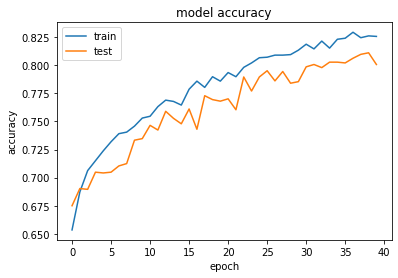

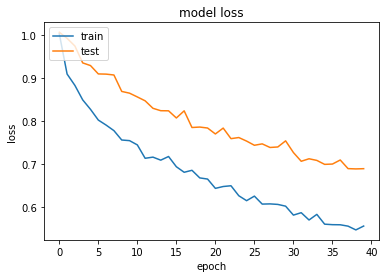

In [89]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [96]:
# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = actual.join(predictions)
finaldf[140:150]

,Actual Values,Predicted Values
140,sad,sad
141,calm,calm
142,fear,surprise
143,disgust,disgust
144,surprise,disgust
145,disgust,disgust
146,fear,angry
147,sad,sad
148,happy,happy
149,calm,calm


In [97]:
# SAVE DATAFRAME TO HTML
finaldf[140:150].to_html('Augmented_Model_Predictions.html')

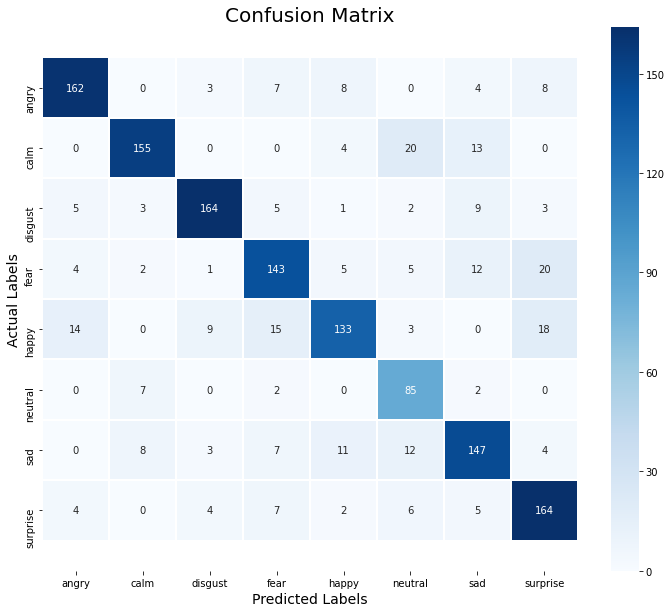

In [88]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Augmented_Model_Confusion_Matrix.png')
plt.show()

In [95]:
from sklearn.metrics import classification_report
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.86      0.84      0.85       192
        calm       0.89      0.81      0.84       192
     disgust       0.89      0.85      0.87       192
        fear       0.77      0.74      0.76       192
       happy       0.81      0.69      0.75       192
     neutral       0.64      0.89      0.74        96
         sad       0.77      0.77      0.77       192
    surprise       0.76      0.85      0.80       192

    accuracy                           0.80      1440
   macro avg       0.80      0.81      0.80      1440
weighted avg       0.81      0.80      0.80      1440



## Hyperparameter Tuning

In [113]:
# STRATIFIED SHUFFLE SPLIT
X = combined_df.drop(['emotion'], axis=1)
y = combined_df.emotion
SSS = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in SSS.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [114]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [115]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [116]:
# RESHAPE DATA TO 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [117]:
# CREATE FUNCTION FOR KERAS CLASSIFIER
def make_classifier(optimizer='adam'):
    #BUILD CNN MODEL
    model = Sequential()
    model.add(Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Dropout(0.2))
    model.add(Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    model.summary()
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

In [119]:
# GRID SEARCH PARAMETERS TO FIND BEST VALUES
model = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [30, 32, 34],
    'nb_epoch': [50, 75, 100],
    'optimizer':['adam','SGD']}

grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5)

grid_search = grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 250, 64)           704       
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 30, 128)           0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 2, 128)            0         
__________

Epoch 1/1
3687/3687 [==============================] - 11s 3ms/step - loss: 2.0574 - acc: 0.2902
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_34 (Conv1D)           (None, 250, 64)           704       
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 30, 128)           0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 12s 3ms/step - loss: 2.0376 - acc: 0.2823
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_49 (Conv1D)           (None, 250, 64)           704       
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 30, 128)           0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 15s 4ms/step - loss: 2.0277 - acc: 0.2750
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_64 (Conv1D)           (None, 250, 64)           704       
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 30, 128)           0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 12s 3ms/step - loss: 2.0490 - acc: 0.2758
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_79 (Conv1D)           (None, 250, 64)           704       
_________________________________________________________________
conv1d_80 (Conv1D)           (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 30, 128)           0         
_________________________________________________________________
dropout_79 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
conv1d_81 (Conv1D)           (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_54 (MaxPooling (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 12s 3ms/step - loss: 2.0612 - acc: 0.2685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_94 (Conv1D)           (None, 250, 64)           704       
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_63 (MaxPooling (None, 30, 128)           0         
_________________________________________________________________
dropout_94 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
conv1d_96 (Conv1D)           (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_64 (MaxPooling (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 14s 4ms/step - loss: 2.0647 - acc: 0.2712
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_109 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_110 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_73 (MaxPooling (None, 30, 128)           0         
_________________________________________________________________
dropout_109 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_74 (MaxPooling (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 17s 5ms/step - loss: 2.0622 - acc: 0.2745
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_124 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_125 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_83 (MaxPooling (None, 30, 128)           0         
_________________________________________________________________
dropout_124 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_126 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_84 (MaxPooling (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 13s 4ms/step - loss: 2.0584 - acc: 0.2842
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_139 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_140 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_93 (MaxPooling (None, 30, 128)           0         
_________________________________________________________________
dropout_139 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_141 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_94 (MaxPooling (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 13s 4ms/step - loss: 2.0606 - acc: 0.2777
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_154 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_103 (MaxPoolin (None, 30, 128)           0         
_________________________________________________________________
dropout_154 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_156 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_104 (MaxPoolin (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 14s 4ms/step - loss: 2.0847 - acc: 0.2672
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_169 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_170 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_113 (MaxPoolin (None, 30, 128)           0         
_________________________________________________________________
dropout_169 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_171 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_114 (MaxPoolin (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 16s 4ms/step - loss: 2.0529 - acc: 0.2807
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_184 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_185 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_123 (MaxPoolin (None, 30, 128)           0         
_________________________________________________________________
dropout_184 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_186 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_124 (MaxPoolin (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 15s 4ms/step - loss: 2.0597 - acc: 0.2634
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_199 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_200 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_133 (MaxPoolin (None, 30, 128)           0         
_________________________________________________________________
dropout_199 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_201 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_134 (MaxPoolin (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 16s 4ms/step - loss: 2.0513 - acc: 0.2810
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_214 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_215 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_143 (MaxPoolin (None, 30, 128)           0         
_________________________________________________________________
dropout_214 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_216 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_144 (MaxPoolin (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 14s 4ms/step - loss: 2.0724 - acc: 0.2723
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_229 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_230 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_153 (MaxPoolin (None, 30, 128)           0         
_________________________________________________________________
dropout_229 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_231 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_154 (MaxPoolin (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 15s 4ms/step - loss: 2.0840 - acc: 0.2723
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_244 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_245 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_163 (MaxPoolin (None, 30, 128)           0         
_________________________________________________________________
dropout_244 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_246 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_164 (MaxPoolin (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 16s 4ms/step - loss: 2.0637 - acc: 0.2832
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_259 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_260 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_173 (MaxPoolin (None, 30, 128)           0         
_________________________________________________________________
dropout_259 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_261 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_174 (MaxPoolin (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 17s 5ms/step - loss: 2.0613 - acc: 0.2742
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_274 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_275 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_183 (MaxPoolin (None, 30, 128)           0         
_________________________________________________________________
dropout_274 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_276 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_184 (MaxPoolin (None, 2, 128)            0         
_____________________________________________

Epoch 1/1
3687/3687 [==============================] - 19s 5ms/step - loss: 2.0769 - acc: 0.2737
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_289 (Conv1D)          (None, 250, 64)           704       
_________________________________________________________________
conv1d_290 (Conv1D)          (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_193 (MaxPoolin (None, 30, 128)           0         
_________________________________________________________________
dropout_289 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
conv1d_291 (Conv1D)          (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_194 (MaxPoolin (None, 2, 128)            0         
_____________________________________________